In [1]:
# import packages
import pickle 
import numpy as np
import pandas as pd

from Mold2_pywrapper import Mold2
from rdkit import Chem

import pubchempy as pcp

c:\Users\Cyril\anaconda3\envs\covid-19-ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# check xgboost version to make sure it is 1.6.2 to be able to lead the model

import xgboost as xgb

print(xgb.__version__)

1.6.2


In [3]:
def load_model(model):
    '''Function to load the model'''
    with open(model, 'rb') as file:
        model = pickle.load(file)
    return model

In [4]:
def load_mask(mask):
    '''Function to load the variance threshold mask'''
    with open(mask, 'rb') as file:
        mask = pickle.load(file)
    return mask

In [5]:
# load model
model = load_model('pkl/classifier1')

# load mask
mask = load_mask('pkl/mask1')

In [6]:
# load sample data
df = pd.read_csv("sample.csv")
print(df.shape)

# apply mask to sample data
df = df.loc[:, mask]

print(df.shape)

(2, 777)
(2, 645)


In [7]:
pred = model.predict(df.head(1))
print(pred)

[1]


In [8]:
pred_prob = model.predict_proba(df.head(1))
if pred.item() == 0:
    confidence = pred_prob[0][0]

if pred.item() == 1:
    confidence = pred_prob[0][1]
    
print(confidence)

0.9945168


In [9]:
pred_prob

array([[0.00548321, 0.9945168 ]], dtype=float32)

## Wrapper Accuracy/Precision Check  

Can we use the wrapper instead of the command line tool (gui)?  
Based on the experiments below, Yes We Can. The wrappers outputs are basically the same as the gui outputs.

In [191]:
smiles_list = ['CC(=O)NC1=CC=C(C=C1)O', 
               'C(C(C1C(=C(C(=O)O1)O)O)O)O', 
               'CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl', 
               'CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl', 
               'CCCCCCN1C(=O)C2=NC3=C(C=C(C(=C3)C)N)N=C2NC1=O',
               'C1=CSC(=C1)C2=C(N=C(N2)C3=CC=C(C=C3)[N+](=O)[O-])C4=CC=CS4',
               'CN1C2=NC3=CC=CC=C3N=C2C(=N1)C4=CC=CC=C4']

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

mold2 = Mold2()
mold2.calculate(mols, show_banner=False)

# returns a dataframe 

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3.90689,-0.108058,0.545455,1.05973
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,3.80735,2.71667,0,-2.73537
2,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,4.85798,-0.806583,0.26087,3.39098
3,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,4.85798,-0.806583,0.26087,3.39098
4,1,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.04439,-0.255985,0.230769,1.66217
5,1,0,0,3,1,0,0,0,0,0,...,0,0,2,0,0,0,5.20945,-0.255985,0.222222,2.62815
6,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,5,-0.78718,0.521739,2.77254


Instantiating a Mold2 object ensures that the executables for your platform are accessible. If this is not the case, an attempt to download them from the website of the FDA is made.

Should one have downloaded the original ZIP file available from the website of the FDA, the executables can be installed using the following:

In [192]:
# path_to_zipfile = '...'  # Replace by the path to the ZIP file on your machine
# mold2 = Mold2.from_executable(path_to_zipfile)
# print(mold2.calculate(mols))

Executables will be installed for future use. From then on, default instanciation may be carried out

In [193]:
mold2 = Mold2()
results = mold2.calculate(mols, show_banner=False)

In [194]:
# convert to float
results = results.astype(float)

# convert to 3 decimal places
results = results.round(3)
results

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.907,-0.108,0.545,1.060
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.807,2.717,0.000,-2.735
2,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.858,-0.807,0.261,3.391
3,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.858,-0.807,0.261,3.391
4,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.044,-0.256,0.231,1.662
5,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,5.209,-0.256,0.222,2.628
6,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.000,-0.787,0.522,2.773


In [195]:
# check for NaN values
results.isnull().values.any()

False

So I'm thinking when setting it up on a server, I can just run the above code to install the executables and leave it on the server. Then when I run the code to generate the descriptors, it will use the executables that are already installed.

In [196]:
results.to_csv('desc/wrapper_output.csv', index=False)

In [197]:
# read output from mold2 gui to compare with results from mold2_pywrapper
df_gui = pd.read_csv("desc/gui_output.txt", sep='\t')
df_gui.drop(['ReadIn_ID', 'USER_ID'], inplace=True, axis=1)
df_gui = df_gui.astype(float)
df_gui = df_gui.round(3)
df_gui

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.907,-0.108,0.545,1.06


In [198]:
# read second output from mold2 gui to compare with results from mold2_pywrapper
df_gui2 = pd.read_csv("desc/gui_output_2.txt", sep='\t')
df_gui2.drop(['ReadIn_ID', 'USER_ID'], inplace=True, axis=1)
df_gui2 = df_gui2.astype(float)
df_gui2 = df_gui2.round(3)
df_gui = pd.concat([df_gui, df_gui2], axis=0)
df_gui

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.907,-0.108,0.545,1.060
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.807,2.717,0.000,-2.735


In [199]:
# check for NaN values
df_gui.isnull().values.any()

False

In [200]:
# compare results from mold2_pywrapper and mold2 gui
df_gui['D775']

0   -0.108
0    2.717
Name: D775, dtype: float64

In [201]:
results['D775']

0   -0.108
1    2.717
2   -0.807
3   -0.807
4   -0.256
5   -0.256
6   -0.787
Name: D775, dtype: float64

In [202]:
# compare results from mold2_pywrapper and mold2 gui
df_gui.equals(results)

False

In [203]:
# compare the first rows of the two dataframes
check = df_gui.head(1) == results.head(1)

# which columns are not equal
whichfalse = check[check == False].stack()[0].index
whichfalse

# compare the second rows of the two dataframes
check2 = df_gui.iloc[1] == results.iloc[1]
check2 = pd.DataFrame(check2).T
whichfalse2 = check2[check2 == False].stack()[0].index
whichfalse2

whichfalse = whichfalse.append(whichfalse2)
whichfalse

Index(['D151', 'D243', 'D315', 'D415', 'D433', 'D438', 'D465', 'D151', 'D197',
       'D210', 'D252', 'D253', 'D318', 'D323', 'D333', 'D440'],
      dtype='object')

In [204]:
df_gui

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.907,-0.108,0.545,1.060
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.807,2.717,0.000,-2.735


In [205]:
results

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.907,-0.108,0.545,1.060
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.807,2.717,0.000,-2.735
2,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.858,-0.807,0.261,3.391
3,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.858,-0.807,0.261,3.391
4,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.044,-0.256,0.231,1.662
5,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,5.209,-0.256,0.222,2.628
6,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.000,-0.787,0.522,2.773


In [206]:
df_gui[whichfalse]

,D151,D243,D315,D415,D433,D438,D465,D151,D197,D210,D252,D253,D318,D323,D333,D440
0,14.413,5.141,45.527,12.793,39.889,6.175,0.697,14.413,45.930,0.139,2.0,0.629,60.719,0.000,0.000,24.998
0,13.351,5.833,51.778,15.107,51.246,0.875,0.578,13.351,29.573,0.117,8.0,2.390,99.751,27.421,27.421,19.579


In [207]:
results[whichfalse]

,D151,D243,D315,D415,D433,D438,D465,D151,D197,D210,D252,D253,D318,D323,D333,D440
0,14.414,5.140,45.526,12.794,39.890,6.176,0.698,14.414,45.930,0.139,2.0,0.629,60.719,0.000,0.000,24.998
1,13.352,5.833,51.778,15.107,51.246,0.875,0.578,13.352,29.572,0.118,7.0,2.091,99.750,26.560,26.560,19.578
2,32.298,18.578,186.505,28.310,114.344,95.467,0.782,32.298,114.652,0.127,2.0,0.405,198.416,0.000,0.000,62.042
3,32.298,18.578,186.505,28.310,114.344,95.467,0.782,32.298,114.652,0.127,2.0,0.405,198.416,0.000,0.000,62.042
4,28.472,22.312,198.094,30.130,110.816,77.719,0.542,28.472,163.740,0.110,2.0,0.382,231.883,0.000,0.000,62.000
5,33.492,20.000,170.536,36.762,77.280,68.666,0.622,33.492,108.145,0.111,4.0,0.764,211.504,158.525,158.525,81.321
6,24.836,14.100,119.276,25.530,69.857,43.800,0.416,24.836,69.582,0.106,2.0,0.432,137.959,24.994,24.994,58.870


In [233]:
print(mold2.descriptor_detail(360))
# rotatable bond fraction

conventional bond index


In [209]:
smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"

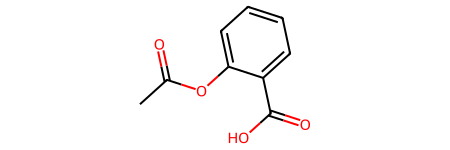

In [210]:
mol = Chem.MolFromSmiles(smiles)
mol

In [211]:
mol_weight = Chem.rdMolDescriptors.CalcExactMolWt(mol)
mol_weight

180.042258736

In [212]:
from rdkit.Chem import Draw

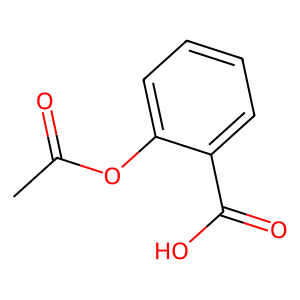

In [213]:
image = Draw.MolToImage(mol)
image

In [214]:
c = pcp.get_compounds(smiles, 'smiles', as_dataframe=True)
c

,atom_stereo_count,atoms,bond_stereo_count,bonds,cactvs_fingerprint,canonical_smiles,charge,complexity,conformer_id_3d,conformer_rmsd_3d,...,pharmacophore_features_3d,record,rotatable_bond_count,shape_fingerprint_3d,shape_selfoverlap_3d,tpsa,undefined_atom_stereo_count,undefined_bond_stereo_count,volume_3d,xlogp
cid,,,,,,,,,,,,,,,,,,,,,
2244,0,"[{'aid': 1, 'number': 8, 'element': 'O', 'y': ...",0,"[{'aid1': 1, 'aid2': 5, 'order': 1}, {'aid1': ...",1100000001110000001110000000000000000000000000...,CC(=O)OC1=CC=CC=C1C(=O)O,0,212,None,None,...,None,"{'id': {'id': {'cid': 2244}}, 'atoms': {'aid':...",3,None,None,63.6,0,0,None,1.2


In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

In [235]:
means = np.load('pkl/means.npy')
stds = np.load('pkl/stds.npy')

In [237]:
results_1=results.head(1) # this is a dataframe with just on row

# load the pkl mask
with open('pkl/variance_filter_mask', 'rb') as file:
    mask = pickle.load(file)

id = 664134         # this is the ID of the compound   
results_1['ID'] = id    # I add the ID to the dataframe so that I can use the mask on it

#move the ID column to the front
cols = results_1.columns.tolist()
cols = cols[-1:] + cols[:-1]
result = results_1[cols]

# use the max to filter
result = result.loc[:, mask]

result.drop(['ID'], inplace=True, axis=1) # I remove the ID now that I have used the mask

for i, column in enumerate(result.columns, 0):
    result[column] = (result[column] - means[i])/stds[i]

max_value = result.iloc[0].max()

min_value = result.iloc[0].min()

values = [id, min_value]

if max_value > 3:
    if min_value > 3:
        output = 'Not in Domain'
        values[1] = min_value
    else: 
        mean_des = result.iloc[0].mean()
        std_des = result.iloc[0].std()
        s_new = mean_des + (1.28 * std_des)
        if s_new > 3:
            output = 'Not in Domain'
            values[1] = s_new
        else:
            output = 'Within Domain'
            values[1] = s_new
            
else:
    output = 'Within Domain'
    values[1] = max_value

C:\Users\Cyril\AppData\Local\Temp\ipykernel_1856\568957178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_1['ID'] = id    # I add the ID to the dataframe so that I can use the mask on it


In [240]:
plt.style.use('ssass.mplstyle')

In [238]:
print(max_value)

# what column has the max value
result.iloc[0].idxmax()

results_1['D360'], result['D360']

8.0303068983161


(0    415.813
 Name: D360, dtype: float64,
 0   -0.384596
 Name: D360, dtype: float64)

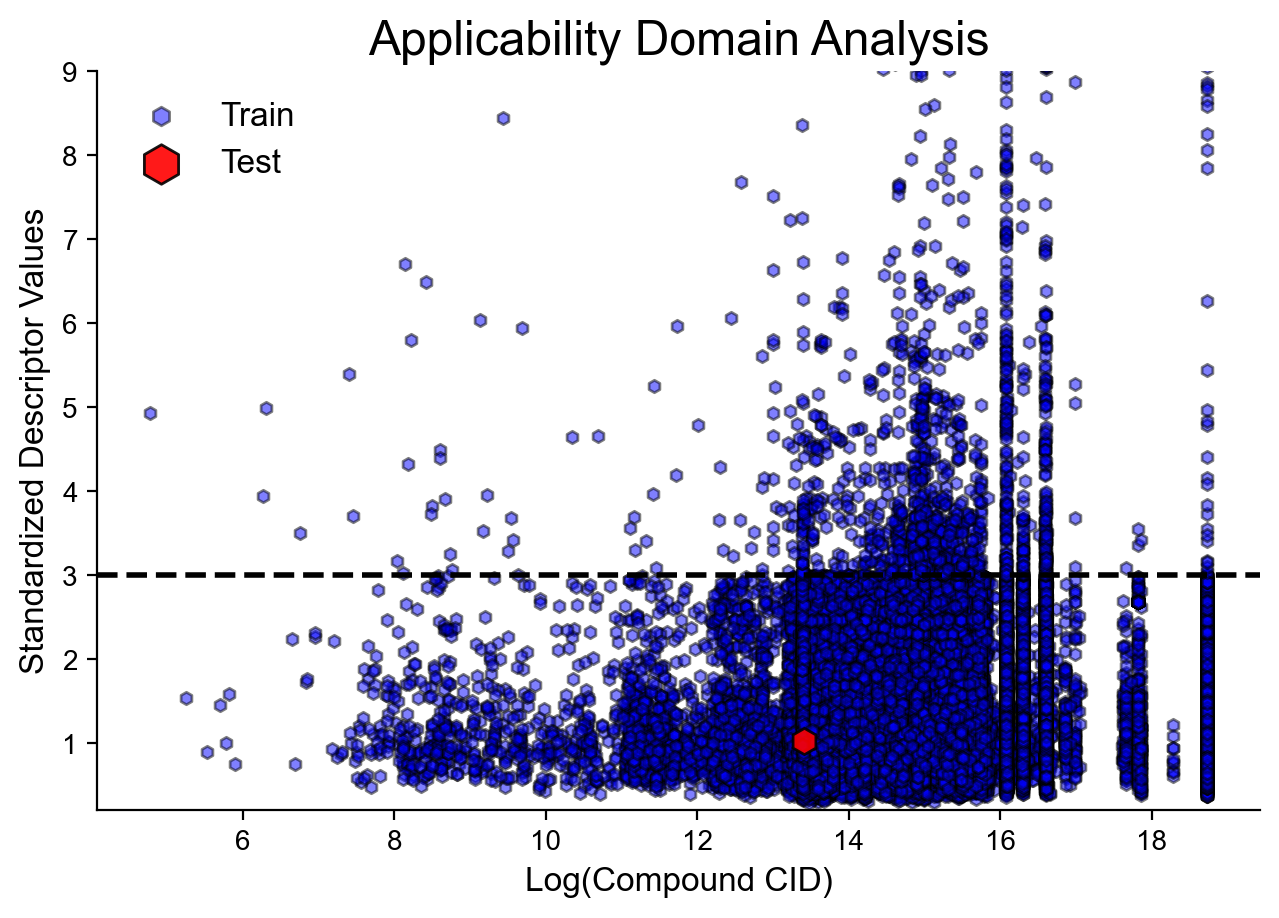

In [257]:
# load the numpy array

cid1 = np.load('pkl/in_domain_cids_train.npy')
cid2 = np.load('pkl/out_domain_cids_train.npy')

stan1 = np.load('pkl/in_domain_train.npy')
stan2 = np.load('pkl/out_domain_train.npy')

plt.scatter(np.log(cid1), stan1, color = 'b',  s=20, alpha=0.5, label="Train", marker="h", edgecolors='black')
plt.scatter(np.log(cid2), stan2, color = 'b',  s=20, alpha=0.5, marker="h", edgecolors='black')

plt.scatter(np.log(id), values[1], color = 'r',  s=90, alpha=0.9, label="Test", marker="h", edgecolors='black')
plt.axhline(3, color = 'black', ls= '--')
plt.ylim(bottom=0.2, top=9)
plt.xlabel("Log(Compound CID)")
plt.ylabel("Standardized Descriptor Values")
plt.title('Applicability Domain Analysis')
plt.legend()
plt.savefig('Applicability domain.png')

In [39]:
s_new

154.759642263514

The wrapper does the calculation up to 6 decimal places whilst the gui does it up to 3. Rounding the values to 3 decimal places in the wrapper gives very similar results to the gui.  
The difference is basically negigible as seen above.  
The two compounds used were acetaminophin and vitamin C

## Backend

The backend logic that will be used for the web app is described below.

1. User inputs a SMILES string
2. Molecular Descriptors are generated using Mold2
3. The descriptors are stored in a database
4. The mask is used to reduce the number of descriptors
5. The new descriptors are passed to the model
6. The model returns a prediction, the activity and the confidence
7. The prediction is stored in the database
8. The prediction is returned to the user

## Frontend

The frontend logic that will be used for the web app is described below.

1. User inputs a SMILES string
2. The SMILES string is passed to the backend
3. The prediction is returned to the user